# 선형 회귀 (Linear Regression)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_df = pd.read_csv("./data/boston_housing_train.csv")
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


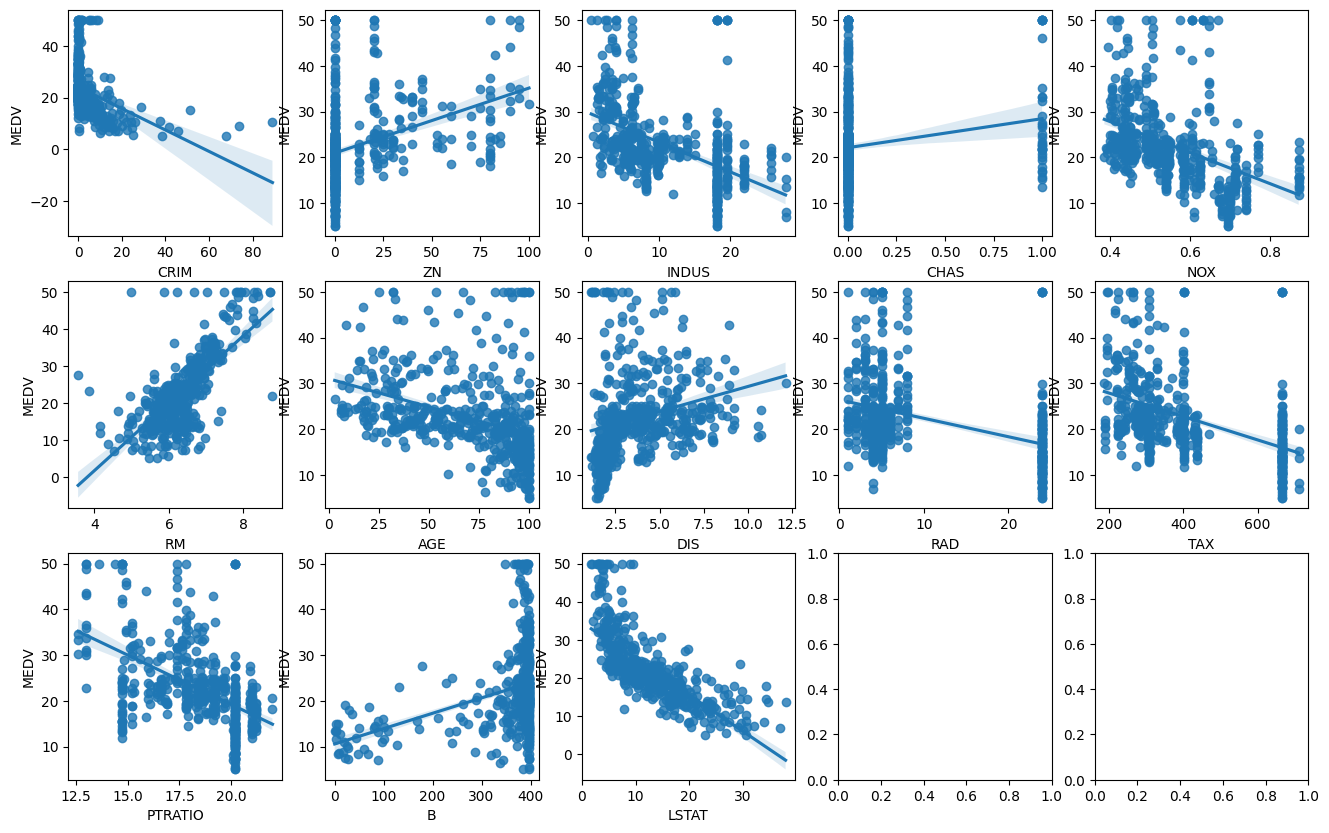

In [14]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

In [15]:
from sklearn.model_selection import train_test_split

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
print(boston_df.columns)
lr.coef_, lr.intercept_

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383845))

In [21]:
# 회귀모델 score()의 기본 평가 지표 == R^2 score (결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.748087259862344, 0.684426728352709)

In [23]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}")

MSE: 22.09869482709827 | RMSE: 4.700924890603791 | MAE: 3.0609395954370795 | R2score: 0.684426728352709


### 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape)
poly.get_feature_names_out()

(379, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [25]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}")
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

MSE: 15.69743582712957 | RMSE: 3.961998968592694 | MAE: 2.583196774476 | R2score: 0.7758378393294851
0.9448313975211593 0.7758378393294851


### [한번 해보기] 캘리포니아 집값 예측 해보기

In [36]:
from sklearn.datasets import fetch_california_housing

california_ds = fetch_california_housing()
california_ds.keys()

california_ds

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

##### 1. DataFrame 생성 -> 구조/기초 통계(요약) 확인
##### 2. 시각화 -> 특성 확인 (hint: 위에서 함)
##### 3. 다중회귀 (학습-평가-MSE/RMSE/MAE/R2score까지 확인)
##### 4. 다항화귀 (학습-평가-MSE/RMSE/MAE/R2score까지 확인)

In [ ]:
cali_df = pd.DataFrame(california_ds['data'], columns=california_ds['feature_names'])
cali_df['target'] = california_ds['target']
cali_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


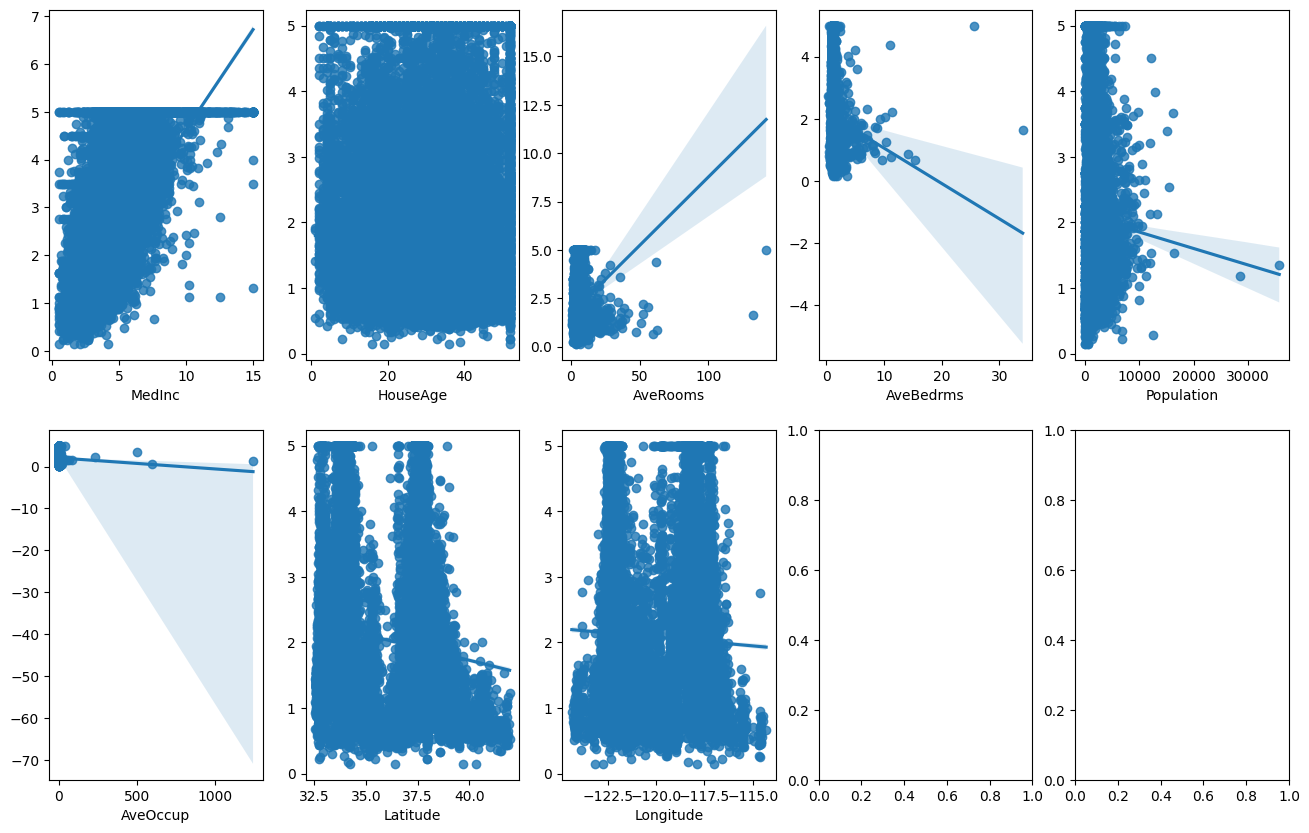

In [60]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=2)
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = california_ds['target']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=cali_df, x=col_name, y=target, ax=ax_temp)

In [61]:
from sklearn.model_selection import train_test_split

X = cali_df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
lr.coef_, lr.intercept_

# 회귀모델 score()의 기본 평가 지표 == R^2 score (결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.609873031052925, 0.5910509795491354)

In [64]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}")

MSE: 0.5411287478470685 | RMSE: 0.7356145375446766 | MAE: 0.5296964012919458 | R2score: 0.5910509795491354


----

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape)
poly.get_feature_names_out()

(15480, 8)


array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [67]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}")
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

MSE: 0.45478928469921964 | RMSE: 0.6743806675010929 | MAE: 0.4646020777049507 | R2score: 0.6563005879298475
0.6829089327528398 0.6563005879298475


In [79]:
def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}")
    return

In [ ]:
from sklearn.pipeline import Pipeline

p_model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(include_bias=False, degree = 2)),
    ('lr', LinearRegression())
])

# 학습
p_model.fit(X_train, y_train)

# 평가
p_model.score(X_test, y_test)

# 예측
y_pred = p_model.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 0.45478928469921964 | RMSE: 0.6743806675010929 | MAE: 0.4646020777049507 | R2score: 0.6563005879298475


In [81]:
p_model_lr = p_model.named_steps['lr']
p_model_lr.coef_, p_model_lr.intercept_

(array([-1.18149889e+01, -8.49101205e-01,  7.93341506e+00, -3.90263703e+01,
        -4.90164991e-04,  1.03727716e+00,  8.27990514e+00,  5.74137596e+00,
        -3.05936096e-02,  1.59801803e-03,  3.86922837e-02, -1.38726408e-01,
         5.11408720e-05, -3.84501143e-03, -1.61733233e-01, -1.51724214e-01,
         2.11029782e-04, -5.98080385e-04,  1.09081918e-02,  2.56573547e-06,
        -1.97181493e-03, -1.03455044e-02, -1.00661914e-02,  1.16865966e-02,
        -1.16437970e-01, -5.51721955e-05,  2.13589483e-02,  1.06985141e-01,
         1.00602280e-01,  2.88810791e-01,  4.88926279e-04, -8.65448374e-02,
        -5.40042730e-01, -4.96189957e-01,  1.42020540e-09,  2.44088253e-05,
         1.05046721e-05,  3.64069361e-06,  5.25946150e-05,  2.03788796e-02,
         1.58781028e-02,  5.80472939e-02,  1.01661358e-01,  3.81657320e-02]),
 np.float64(205.9539259931978))